# Optimistic Initial Values Bandit
A key feature of the optimistic initial values bandit is we set a
higher-than-expected initial value of "estimates" for the bandit rewards
probabilities, then greedily choose the "best", updating these estimates down
to their true values as they are made.

One significant thing to note is, once the true best bandit's estimated rewards
probability drops to the true value, from that point on, no other bandit
will be chosen as all other bandits have a lower actual reward probability.
Thus, none of the other reward probability estimates will be near/at the true
values.

In [1]:
import rl_python.bandits as rlb

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use({'figure.facecolor': 'white'})

In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
gob_args = rlb.GangOfBanditsInputs(
    p_actuals=[0.3, 0.5, 0.7],
    p_estimates=None # [5, 5, 5]
)

games = rlb.BanditExperiments(gob_args, 5000, 200)
strategy_wrapper = rlb.StrategyWrapper(rlb.ExponentialDecayEpsilonGreedy, {'epsilon_0': 0.99, 'alpha': 0.99})

In [20]:
record = games.run_replicates_parallel(strategy_wrapper)

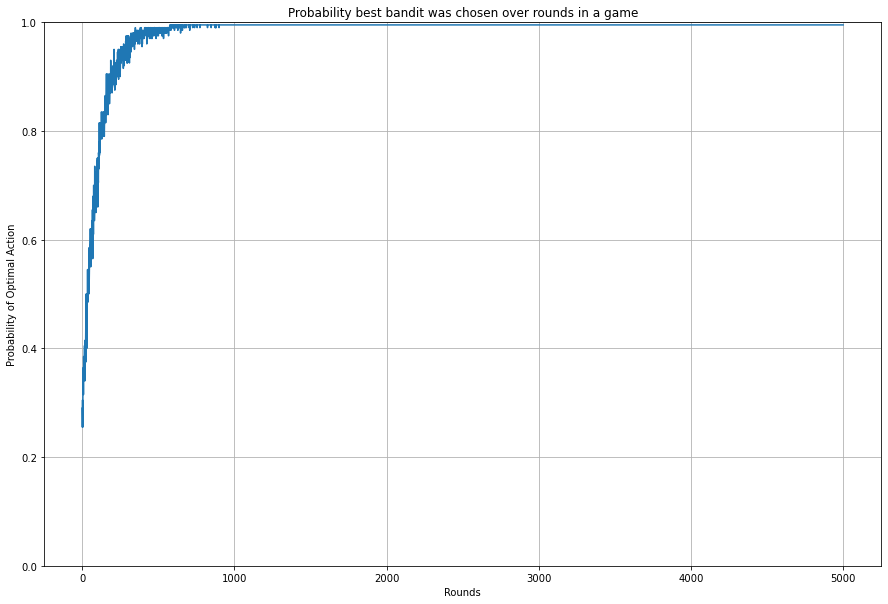

In [21]:
rlb.plot_p_best_bandit_chosen_vs_rounds_in_game([record], ['Trial'])

In [6]:
gob_args = rlb.GangOfBanditsInputs(
    p_actuals=[0.3, 0.5, 0.7],
    p_estimates=[5, 5, 5]
)

games = rlb.BanditGames(gob_args, 5000, 200)
strategy_wrapper = rlb.StrategyWrapper(rlb.Greedy, dict())

AttributeError: module 'rl_python.bandits' has no attribute 'BanditGames'

In [11]:
record = games.play_season_parallel(strategy_wrapper)

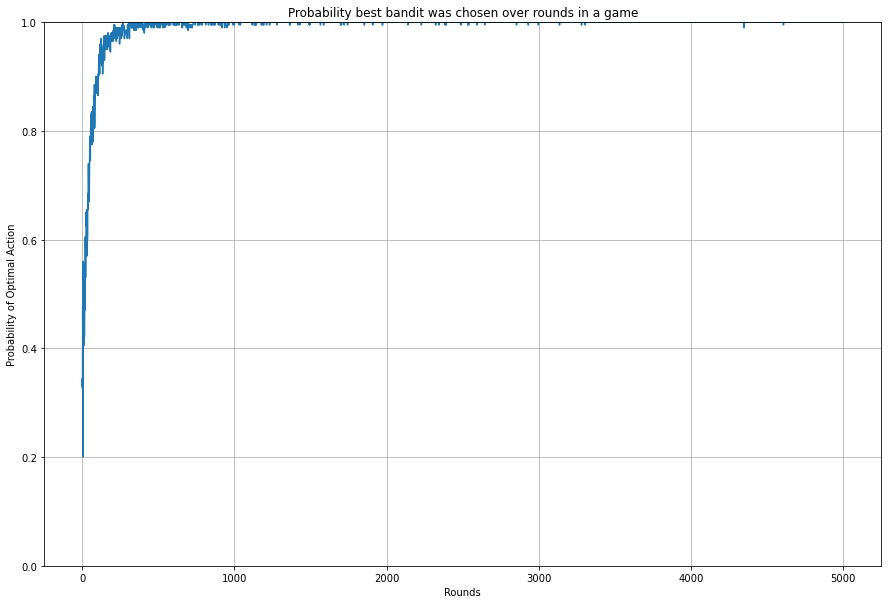

In [12]:
rlb.plot_p_best_bandit_chosen_vs_rounds_in_game([record], ['Trial'])

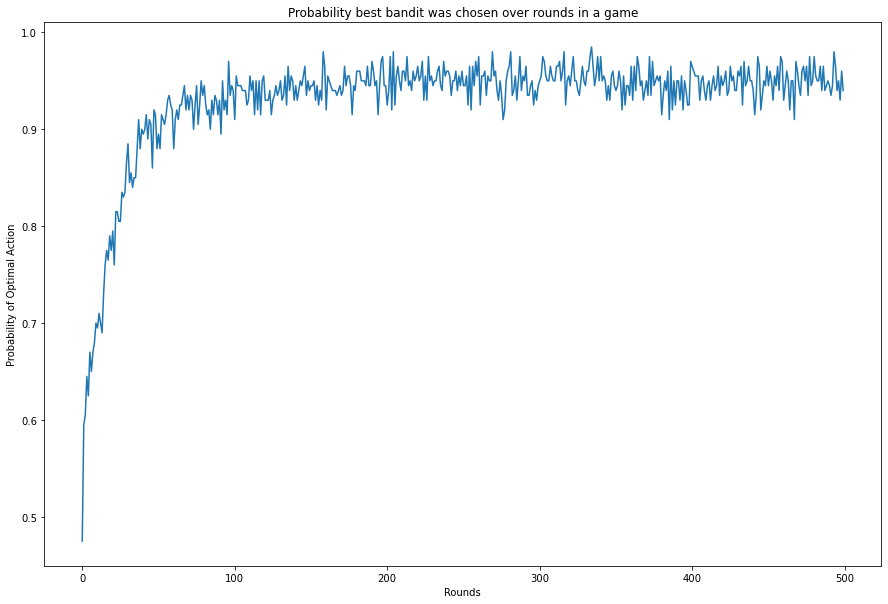

In [7]:

gob_args_2 = rlb.GangOfBanditsInputs(
    p_actuals=[0.3, 0.7]
)
games_2 = rlb.BanditGames(gob_args_2, 500, 200)
strategy_2_params = {'epsilon': 0.1}
strategy_2 = rlb.EpsilonGreedy
record_2 = games_2.play_season_parallel(strategy_2, **strategy_2_params)
rlb.plot_p_best_bandit_chosen_vs_rounds_in_game([record_2], ['epsilon 0.1'])